In [455]:
import sklearn
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# 1. Reading games.csv

In [456]:
games = pd.read_csv('./games.csv', ';')
#print(games.head(5))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

/home/diegoflm/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [457]:
# Cuantitative variables (integer)
games.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# 2. Split training data from test data: 80% for training, 20% for testing.

In [458]:
from sklearn.model_selection import train_test_split
N=len(games)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(games, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [459]:
#train_data.shape
#train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 20177 to 25706
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  

# 3. Pipelines, encoding and scaling.

# Pipeline for categorical attributes

In [460]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [461]:
#6 categorical attributes, where the numeric values don't have a numerical meaning.
cat_atts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Pipeline for numeric attributes

In [462]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

It was found that the attribute 'gameDuration' is not really useful for the model,  
and leaving it out of the num_atts slightly improves the accuracy. 

In [463]:
#10 numeric attributes
#num_atts = ['gameDuration', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
num_atts =                ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
        't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 
        't2_riftHeraldKills']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())    #Standarization by centering and scaling.
    ])

# Pipeline completo

In [464]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", cat_pipeline, cat_atts), 
])

In [465]:
X_train = full_pipeline.fit_transform(train_data)
X_train.shape

(40228, 27)

In [466]:
X_train[0,:]

array([-1.5574879 , -0.81943583, -0.64794832, -1.18258385, -0.58619159,
       -0.96808781, -0.80043352, -0.68994557, -1.18393413, -0.57095867,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ])

In [467]:
y_train = train_data["winner"]
y_train

20177    2
16752    1
12331    2
24243    2
40263    1
        ..
38530    1
26       2
13686    2
41242    1
25706    1
Name: winner, Length: 40228, dtype: int64

# 4. Decision Tree
## Decision Tree Classifier

scoresArr0[ 0 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 0 ].mean() =  0.9713632628544971
scoresArr0[ 1 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 1 ].mean() =  0.9713632628544971
scoresArr0[ 2 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 2 ].mean() =  0.9713632628544971
scoresArr0[ 3 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 3 ].mean() =  0.9713632628544971
scoresArr0[ 4 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 4 ].mean() =  0.9713632628544971
scoresArr0[ 5 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 5 ].mean() =  0.9713632628544971
scoresArr0[ 6 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 6 ].mean() =  0.9713632628544971
scoresArr0[ 7 ] =  [0.9711658  0.97017151 0.97141437 0.97265382 0.97141081]
scoresArr0[ 7 ].mean() =  0.9713632628544971
scoresArr0[ 8 ] =  [0.9711658  0

[Text(0.37901754513145375, 0.9791666666666666, 'X[5] <= 0.214\ngini = 0.5\nsamples = 40228\nvalue = [20355, 19873]'),
 Text(0.12861953143587915, 0.9375, 'X[0] <= -0.889\ngini = 0.204\nsamples = 21263\nvalue = [18816, 2447]'),
 Text(0.032402450630502025, 0.8958333333333334, 'X[5] <= -1.099\ngini = 0.196\nsamples = 2086\nvalue = [230, 1856]'),
 Text(0.013085891030216512, 0.8541666666666666, 'X[8] <= -0.772\ngini = 0.307\nsamples = 253\nvalue = [205, 48]'),
 Text(0.0076136093266714255, 0.8125, 'X[0] <= -1.424\ngini = 0.122\nsamples = 200\nvalue = [187, 13]'),
 Text(0.004758505829169641, 0.7708333333333334, 'X[5] <= -1.362\ngini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.0019034023316678564, 0.7291666666666666, 'X[21] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.0009517011658339282, 0.6875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.0028551034975017845, 0.6875, 'X[9] <= 0.59\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.0019034023316678564, 0.6458333

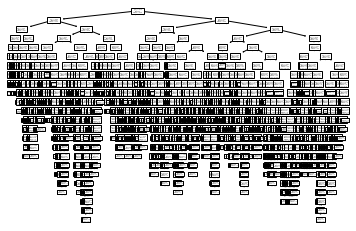

In [468]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr0 = []
scoresArr0 = []
for i in range (10):
    treeArr0.append( tree.DecisionTreeClassifier( criterion = 'gini', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123 ) )
    treeArr0[i].fit(X_train, y_train)
    scoresArr0.append( cross_val_score( treeArr0[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr0[", i, "] = ", scoresArr0[i])
    print("scoresArr0[", i, "].mean() = ", scoresArr0[i].mean())
tree.plot_tree(treeArr0[9])
    #tree.export_graphviz(decision_tree = treeArr0[i], class_names = True ,
            #out_file = "DTClassifier-9b-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [469]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.5574879 , -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.75572424, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48846968, -0.81943583,  1.05479959, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.48846968, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.11505765,  0.75802814, -0.64794832, ...,  0.        ,
         1.        ,  0.        ],
       [-1.02297879, -0.81943583, -0.64794832, ...,  0.        ,
         0.        ,  1.        ]])

In [470]:
y_predArr0 = []

for i in range(10):
    y_predArr0.append( treeArr0[i].predict( X_test ) )
    print(y_predArr0[i])

[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]


In [471]:
y_test = test_data["winner"]

# Results

In [472]:
from sklearn.metrics import mean_absolute_error
maeArr0 = []
for i in range(10):
    maeArr0.append( mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr0[i]
       ) )
    print(f"Mean Absolute Error for tree", i + 1, " = ", maeArr0[i])

Mean Absolute Error for tree 1  =  0.02913103996818453
Mean Absolute Error for tree 2  =  0.02913103996818453
Mean Absolute Error for tree 3  =  0.02913103996818453
Mean Absolute Error for tree 4  =  0.02913103996818453
Mean Absolute Error for tree 5  =  0.02913103996818453
Mean Absolute Error for tree 6  =  0.02913103996818453
Mean Absolute Error for tree 7  =  0.02913103996818453
Mean Absolute Error for tree 8  =  0.02913103996818453
Mean Absolute Error for tree 9  =  0.02913103996818453
Mean Absolute Error for tree 10  =  0.02913103996818453


In [473]:
from sklearn.metrics import accuracy_score
accuracyArr0 = []
for i in range (10):
    accuracyArr0.append( accuracy_score(y_test, y_predArr0[i]) )
    print( "Accuracy of tree", i + 1, " = ", accuracyArr0[i] ) 

Accuracy of tree 1  =  0.9708689600318154
Accuracy of tree 2  =  0.9708689600318154
Accuracy of tree 3  =  0.9708689600318154
Accuracy of tree 4  =  0.9708689600318154
Accuracy of tree 5  =  0.9708689600318154
Accuracy of tree 6  =  0.9708689600318154
Accuracy of tree 7  =  0.9708689600318154
Accuracy of tree 8  =  0.9708689600318154
Accuracy of tree 9  =  0.9708689600318154
Accuracy of tree 10  =  0.9708689600318154


# 5. Summary (accuracy)

In [474]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree1', accuracyArr0[0]],
      ['tree2', accuracyArr0[1]],
      ['tree3', accuracyArr0[2]],
      ['tree4', accuracyArr0[3]],
      ['tree5', accuracyArr0[4]],
      ['tree6', accuracyArr0[5]],
      ['tree7', accuracyArr0[6]],
      ['tree8', accuracyArr0[7]],
      ['tree9', accuracyArr0[8]],
      ['tree10', accuracyArr0[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree1  | 0.9708689600318154 |
+--------+--------------------+
| tree2  | 0.9708689600318154 |
+--------+--------------------+
| tree3  | 0.9708689600318154 |
+--------+--------------------+
| tree4  | 0.9708689600318154 |
+--------+--------------------+
| tree5  | 0.9708689600318154 |
+--------+--------------------+
| tree6  | 0.9708689600318154 |
+--------+--------------------+
| tree7  | 0.9708689600318154 |
+--------+--------------------+
| tree8  | 0.9708689600318154 |
+--------+--------------------+
| tree9  | 0.9708689600318154 |
+--------+--------------------+
| tree10 | 0.9708689600318154 |
+--------+--------------------+


Exactly the same accuracy was obtained for all ten values of max_depth

# 6. Now with criterion = entropy, splitter = best.

scoresArr1[ 0 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 0 ].mean() =  0.9718107272246114
scoresArr1[ 1 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 1 ].mean() =  0.9718107272246114
scoresArr1[ 2 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 2 ].mean() =  0.9718107272246114
scoresArr1[ 3 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 3 ].mean() =  0.9718107272246114
scoresArr1[ 4 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 4 ].mean() =  0.9718107272246114
scoresArr1[ 5 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 5 ].mean() =  0.9718107272246114
scoresArr1[ 6 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 6 ].mean() =  0.9718107272246114
scoresArr1[ 7 ] =  [0.97004723 0.97178722 0.97166294 0.97526414 0.97029211]
scoresArr1[ 7 ].mean() =  0.9718107272246114
scoresArr1[ 8 ] =  [0.97004723 0

[Text(0.3603078275581066, 0.9791666666666666, 'X[5] <= 0.214\nentropy = 1.0\nsamples = 40228\nvalue = [20355, 19873]'),
 Text(0.14850836167800455, 0.9375, 'X[0] <= -0.622\nentropy = 0.515\nsamples = 21263\nvalue = [18816, 2447]'),
 Text(0.05454577664399093, 0.8958333333333334, 'X[5] <= -1.099\nentropy = 0.738\nsamples = 2621\nvalue = [546, 2075]'),
 Text(0.020833333333333332, 0.8541666666666666, 'X[0] <= -1.157\nentropy = 0.466\nsamples = 504\nvalue = [454, 50]'),
 Text(0.01445578231292517, 0.8125, 'X[5] <= -1.362\nentropy = 0.974\nsamples = 111\nvalue = [66, 45]'),
 Text(0.007936507936507936, 0.7708333333333334, 'X[0] <= -1.424\nentropy = 0.459\nsamples = 62\nvalue = [56, 6]'),
 Text(0.005668934240362812, 0.7291666666666666, 'X[3] <= -0.767\nentropy = 0.918\nsamples = 15\nvalue = [10, 5]'),
 Text(0.0045351473922902496, 0.6875, 'X[8] <= -0.772\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.003401360544217687, 0.6458333333333334, 'X[9] <= 0.59\nentropy = 0.918\nsamples = 6\nval

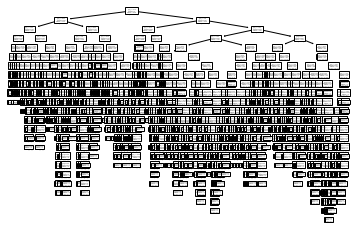

In [475]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr1 = []
scoresArr1 = []
for i in range (10):
    treeArr1.append( tree.DecisionTreeClassifier( criterion = 'entropy', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123 ) )
    treeArr1[i].fit(X_train, y_train)
    scoresArr1.append( cross_val_score( treeArr1[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr1[", i, "] = ", scoresArr1[i])
    print("scoresArr1[", i, "].mean() = ", scoresArr1[i].mean())
tree.plot_tree(treeArr1[9])
    #tree.export_graphviz(decision_tree = treeArr1[i], class_names = True,
    #        out_file = "DTClassifier-6-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [476]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.5574879 , -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.75572424, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48846968, -0.81943583,  1.05479959, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.48846968, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.11505765,  0.75802814, -0.64794832, ...,  0.        ,
         1.        ,  0.        ],
       [-1.02297879, -0.81943583, -0.64794832, ...,  0.        ,
         0.        ,  1.        ]])

In [477]:
y_predArr1 = []

for i in range(10):
    y_predArr1.append( treeArr1[i].predict( X_test ) )
    print(y_predArr1[i])

[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]


In [478]:
y_test = test_data["winner"]

# Results

In [479]:
from sklearn.metrics import mean_absolute_error
maeArr1 = []
for i in range(10):
    maeArr1.append( mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr1[i]
       ) )
    print(f"Mean Absolute Error for tree", i + 1, " = ", maeArr1[i])

Mean Absolute Error for tree 1  =  0.028932193278981905
Mean Absolute Error for tree 2  =  0.028932193278981905
Mean Absolute Error for tree 3  =  0.028932193278981905
Mean Absolute Error for tree 4  =  0.028932193278981905
Mean Absolute Error for tree 5  =  0.028932193278981905
Mean Absolute Error for tree 6  =  0.028932193278981905
Mean Absolute Error for tree 7  =  0.028932193278981905
Mean Absolute Error for tree 8  =  0.028932193278981905
Mean Absolute Error for tree 9  =  0.028932193278981905
Mean Absolute Error for tree 10  =  0.028932193278981905


In [480]:
from sklearn.metrics import accuracy_score
accuracyArr1 = []
for i in range (10):
    accuracyArr1.append( accuracy_score(y_test, y_predArr1[i]) )
    print( "Accuracy of model", i + 1, " = ", accuracyArr1[i] ) 

Accuracy of model 1  =  0.9710678067210181
Accuracy of model 2  =  0.9710678067210181
Accuracy of model 3  =  0.9710678067210181
Accuracy of model 4  =  0.9710678067210181
Accuracy of model 5  =  0.9710678067210181
Accuracy of model 6  =  0.9710678067210181
Accuracy of model 7  =  0.9710678067210181
Accuracy of model 8  =  0.9710678067210181
Accuracy of model 9  =  0.9710678067210181
Accuracy of model 10  =  0.9710678067210181


In [481]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree11', accuracyArr1[0]],
      ['tree12', accuracyArr1[1]],
      ['tree13', accuracyArr1[2]],
      ['tree14', accuracyArr1[3]],
      ['tree15', accuracyArr1[4]],
      ['tree16', accuracyArr1[5]],
      ['tree17', accuracyArr1[6]],
      ['tree18', accuracyArr1[7]],
      ['tree19', accuracyArr1[8]],
      ['tree20', accuracyArr1[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree11 | 0.9710678067210181 |
+--------+--------------------+
| tree12 | 0.9710678067210181 |
+--------+--------------------+
| tree13 | 0.9710678067210181 |
+--------+--------------------+
| tree14 | 0.9710678067210181 |
+--------+--------------------+
| tree15 | 0.9710678067210181 |
+--------+--------------------+
| tree16 | 0.9710678067210181 |
+--------+--------------------+
| tree17 | 0.9710678067210181 |
+--------+--------------------+
| tree18 | 0.9710678067210181 |
+--------+--------------------+
| tree19 | 0.9710678067210181 |
+--------+--------------------+
| tree20 | 0.9710678067210181 |
+--------+--------------------+


# Comparison
The accuracy with criterion = 'entropy' is slightly better, but very similar  
that the accuracy with criterion = 'gini'

# 7. Now with criterion = entropy, splitter = random.

scoresArr2[ 0 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 0 ].mean() =  0.9729540938237824
scoresArr2[ 1 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 1 ].mean() =  0.9729540938237824
scoresArr2[ 2 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 2 ].mean() =  0.9729540938237824
scoresArr2[ 3 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 3 ].mean() =  0.9729540938237824
scoresArr2[ 4 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 4 ].mean() =  0.9729540938237824
scoresArr2[ 5 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 5 ].mean() =  0.9729540938237824
scoresArr2[ 6 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 6 ].mean() =  0.9729540938237824
scoresArr2[ 7 ] =  [0.97501864 0.97303008 0.97352722 0.97339963 0.9697949 ]
scoresArr2[ 7 ].mean() =  0.9729540938237824
scoresArr2[ 8 ] =  [0.97501864 0

[Text(0.3570728537261949, 0.9791666666666666, 'X[5] <= -0.276\nentropy = 1.0\nsamples = 40228\nvalue = [20355, 19873]'),
 Text(0.14193303163544999, 0.9375, 'X[16] <= 0.993\nentropy = 0.318\nsamples = 17206\nvalue = [16214, 992]'),
 Text(0.0991926964367291, 0.8958333333333334, 'X[14] <= 0.906\nentropy = 0.903\nsamples = 3083\nvalue = [2101, 982]'),
 Text(0.05999457514846962, 0.8541666666666666, 'X[5] <= -0.689\nentropy = 0.442\nsamples = 1951\nvalue = [1772, 179]'),
 Text(0.0357040886249429, 0.8125, 'X[0] <= -0.965\nentropy = 0.29\nsamples = 1810\nvalue = [1718, 92]'),
 Text(0.017016902695294656, 0.7708333333333334, 'X[5] <= -1.16\nentropy = 0.83\nsamples = 263\nvalue = [194, 69]'),
 Text(0.008222932846048425, 0.7291666666666666, 'X[8] <= -0.795\nentropy = 0.399\nsamples = 202\nvalue = [186, 16]'),
 Text(0.003654636820465966, 0.6875, 'X[13] <= 0.911\nentropy = 0.126\nsamples = 173\nvalue = [170, 3]'),
 Text(0.001827318410232983, 0.6458333333333334, 'X[21] <= 0.499\nentropy = 0.684\nsamp

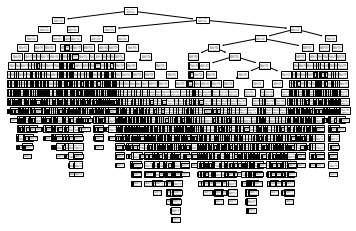

In [482]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr2 = []
scoresArr2 = []
for i in range (10):
    treeArr2.append( tree.DecisionTreeClassifier( criterion = 'entropy', max_depth = 100 * (i + 1),
        splitter = "random", random_state = 123 ) )
    treeArr2[i].fit(X_train, y_train)
    scoresArr2.append( cross_val_score( treeArr2[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr2[", i, "] = ", scoresArr2[i])
    print("scoresArr2[", i, "].mean() = ", scoresArr2[i].mean())
tree.plot_tree(treeArr2[9])
    #tree.export_graphviz(decision_tree = treeArr2[i], class_names = True,
    #        out_file = "DTClassifier-7-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [483]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.5574879 , -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.75572424, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48846968, -0.81943583,  1.05479959, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.48846968, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.11505765,  0.75802814, -0.64794832, ...,  0.        ,
         1.        ,  0.        ],
       [-1.02297879, -0.81943583, -0.64794832, ...,  0.        ,
         0.        ,  1.        ]])

In [484]:
y_predArr2 = []

for i in range(10):
    y_predArr2.append( treeArr2[i].predict( X_test ) )
    print(y_predArr2[i])

#y_pred1 = tree1.predict(X_test)  
#y_pred1

[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]


In [485]:
y_test = test_data["winner"]

In [486]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr2[i]
       )
    print(f"Mean Absolute Error for model", i + 1, " = ", mae)

Mean Absolute Error for model 1  =  0.03141777689401472
Mean Absolute Error for model 2  =  0.03141777689401472
Mean Absolute Error for model 3  =  0.03141777689401472
Mean Absolute Error for model 4  =  0.03141777689401472
Mean Absolute Error for model 5  =  0.03141777689401472
Mean Absolute Error for model 6  =  0.03141777689401472
Mean Absolute Error for model 7  =  0.03141777689401472
Mean Absolute Error for model 8  =  0.03141777689401472
Mean Absolute Error for model 9  =  0.03141777689401472
Mean Absolute Error for model 10  =  0.03141777689401472


In [487]:
from sklearn.metrics import accuracy_score
accuracyArr2 = []
for i in range (10):
    accuracyArr2.append( accuracy_score(y_test, y_predArr2[i]) )
    print( "Accuracy of model", i + 1, " = ", accuracyArr2[i] ) 

Accuracy of model 1  =  0.9685822231059853
Accuracy of model 2  =  0.9685822231059853
Accuracy of model 3  =  0.9685822231059853
Accuracy of model 4  =  0.9685822231059853
Accuracy of model 5  =  0.9685822231059853
Accuracy of model 6  =  0.9685822231059853
Accuracy of model 7  =  0.9685822231059853
Accuracy of model 8  =  0.9685822231059853
Accuracy of model 9  =  0.9685822231059853
Accuracy of model 10  =  0.9685822231059853


# Accuracy

In [488]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree21', accuracyArr2[0]],
      ['tree22', accuracyArr2[1]],
      ['tree23', accuracyArr2[2]],
      ['tree24', accuracyArr2[3]],
      ['tree25', accuracyArr2[4]],
      ['tree26', accuracyArr2[5]],
      ['tree27', accuracyArr2[6]],
      ['tree28', accuracyArr2[7]],
      ['tree29', accuracyArr2[8]],
      ['tree30', accuracyArr2[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree21 | 0.9685822231059853 |
+--------+--------------------+
| tree22 | 0.9685822231059853 |
+--------+--------------------+
| tree23 | 0.9685822231059853 |
+--------+--------------------+
| tree24 | 0.9685822231059853 |
+--------+--------------------+
| tree25 | 0.9685822231059853 |
+--------+--------------------+
| tree26 | 0.9685822231059853 |
+--------+--------------------+
| tree27 | 0.9685822231059853 |
+--------+--------------------+
| tree28 | 0.9685822231059853 |
+--------+--------------------+
| tree29 | 0.9685822231059853 |
+--------+--------------------+
| tree30 | 0.9685822231059853 |
+--------+--------------------+


# Comparison
The accuracies are very similar, the the last is lower.

# 8. Hyper-parameters that lead to the best accuracy so far:

criterion = 'entropy',  
splitter = random,  
random_state = 123.  
A change in max_depth, as long as its value is greater than 100, doesn't change the accuracy.

# 9. Chosen hyper-parameter: min_samples_leaf: int or float, default = 1
"The minimum number of samples required to be at a leaf node." 

# min_samples_leaf = 3 :

scoresArr3[ 0 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 0 ].mean() =  0.9749428511354923
scoresArr3[ 1 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 1 ].mean() =  0.9749428511354923
scoresArr3[ 2 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 2 ].mean() =  0.9749428511354923
scoresArr3[ 3 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 3 ].mean() =  0.9749428511354923
scoresArr3[ 4 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 4 ].mean() =  0.9749428511354923
scoresArr3[ 5 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 5 ].mean() =  0.9749428511354923
scoresArr3[ 6 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 6 ].mean() =  0.9749428511354923
scoresArr3[ 7 ] =  [0.97439722 0.97439722 0.97501864 0.97638285 0.97451833]
scoresArr3[ 7 ].mean() =  0.9749428511354923
scoresArr3[ 8 ] =  [0.97439722 0

[Text(0.37499917177296244, 0.9782608695652174, 'X[5] <= 0.214\ngini = 0.5\nsamples = 40228\nvalue = [20355, 19873]'),
 Text(0.12654911585107284, 0.9347826086956522, 'X[0] <= -0.889\ngini = 0.204\nsamples = 21263\nvalue = [18816, 2447]'),
 Text(0.031040624204902043, 0.8913043478260869, 'X[5] <= -1.099\ngini = 0.196\nsamples = 2086\nvalue = [230, 1856]'),
 Text(0.013908913578152828, 0.8478260869565217, 'X[8] <= -0.772\ngini = 0.307\nsamples = 253\nvalue = [205, 48]'),
 Text(0.0067848358917818674, 0.8043478260869565, 'X[0] <= -1.424\ngini = 0.122\nsamples = 200\nvalue = [187, 13]'),
 Text(0.00407090153506912, 0.7608695652173914, 'X[5] <= -1.362\ngini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.002713934356712747, 0.717391304347826, 'X[21] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.0013569671783563734, 0.6739130434782609, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.00407090153506912, 0.6739130434782609, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.0

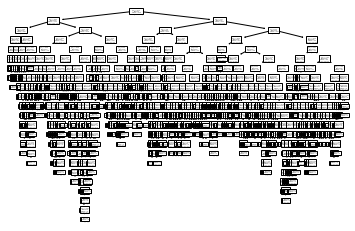

In [489]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr3 = []
scoresArr3 = []
for i in range (10):
    treeArr3.append( tree.DecisionTreeClassifier( criterion = 'gini', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123, min_samples_leaf = 3 ) )
    treeArr3[i].fit(X_train, y_train)
    scoresArr3.append( cross_val_score( treeArr3[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr3[", i, "] = ", scoresArr3[i])
    print("scoresArr3[", i, "].mean() = ", scoresArr3[i].mean())
tree.plot_tree(treeArr3[9])
    #tree.export_graphviz(decision_tree = treeArr3[i], class_names = True,
    #        out_file = "DTClassifier-9a-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [490]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.5574879 , -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.75572424, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48846968, -0.81943583,  1.05479959, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.48846968, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.11505765,  0.75802814, -0.64794832, ...,  0.        ,
         1.        ,  0.        ],
       [-1.02297879, -0.81943583, -0.64794832, ...,  0.        ,
         0.        ,  1.        ]])

In [491]:
y_predArr3 = []

for i in range(10):
    y_predArr3.append( treeArr3[i].predict( X_test ) )
    print(y_predArr3[i])

#y_pred1 = tree1.predict(X_test)  
#y_pred1

[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]


In [492]:
y_test = test_data["winner"]

In [493]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr3[i]
       )
    print(f"Mean Absolute Error for model", i + 31, " = ", mae)

Mean Absolute Error for model 31  =  0.028236229866772718
Mean Absolute Error for model 32  =  0.028236229866772718
Mean Absolute Error for model 33  =  0.028236229866772718
Mean Absolute Error for model 34  =  0.028236229866772718
Mean Absolute Error for model 35  =  0.028236229866772718
Mean Absolute Error for model 36  =  0.028236229866772718
Mean Absolute Error for model 37  =  0.028236229866772718
Mean Absolute Error for model 38  =  0.028236229866772718
Mean Absolute Error for model 39  =  0.028236229866772718
Mean Absolute Error for model 40  =  0.028236229866772718


In [494]:
from sklearn.metrics import accuracy_score
accuracyArr3 = []
for i in range (10):
    accuracyArr3.append( accuracy_score(y_test, y_predArr3[i]) )
    print( "Accuracy of model", i + 31, " = ", accuracyArr3[i] ) 

Accuracy of model 31  =  0.9717637701332272
Accuracy of model 32  =  0.9717637701332272
Accuracy of model 33  =  0.9717637701332272
Accuracy of model 34  =  0.9717637701332272
Accuracy of model 35  =  0.9717637701332272
Accuracy of model 36  =  0.9717637701332272
Accuracy of model 37  =  0.9717637701332272
Accuracy of model 38  =  0.9717637701332272
Accuracy of model 39  =  0.9717637701332272
Accuracy of model 40  =  0.9717637701332272


In [495]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree31', accuracyArr3[0]],
      ['tree32', accuracyArr3[1]],
      ['tree33', accuracyArr3[2]],
      ['tree34', accuracyArr3[3]],
      ['tree35', accuracyArr3[4]],
      ['tree36', accuracyArr3[5]],
      ['tree37', accuracyArr3[6]],
      ['tree38', accuracyArr3[7]],
      ['tree39', accuracyArr3[8]],
      ['tree40', accuracyArr3[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree31 | 0.9717637701332272 |
+--------+--------------------+
| tree32 | 0.9717637701332272 |
+--------+--------------------+
| tree33 | 0.9717637701332272 |
+--------+--------------------+
| tree34 | 0.9717637701332272 |
+--------+--------------------+
| tree35 | 0.9717637701332272 |
+--------+--------------------+
| tree36 | 0.9717637701332272 |
+--------+--------------------+
| tree37 | 0.9717637701332272 |
+--------+--------------------+
| tree38 | 0.9717637701332272 |
+--------+--------------------+
| tree39 | 0.9717637701332272 |
+--------+--------------------+
| tree40 | 0.9717637701332272 |
+--------+--------------------+


# min_samples_leaf = 5 :

scoresArr4[ 0 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 0 ].mean() =  0.9758874909296406
scoresArr4[ 1 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 1 ].mean() =  0.9758874909296406
scoresArr4[ 2 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 2 ].mean() =  0.9758874909296406
scoresArr4[ 3 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 3 ].mean() =  0.9758874909296406
scoresArr4[ 4 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 4 ].mean() =  0.9758874909296406
scoresArr4[ 5 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 5 ].mean() =  0.9758874909296406
scoresArr4[ 6 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 6 ].mean() =  0.9758874909296406
scoresArr4[ 7 ] =  [0.9745215  0.97700721 0.97414865 0.97799876 0.97576134]
scoresArr4[ 7 ].mean() =  0.9758874909296406
scoresArr4[ 8 ] =  [0.9745215  0

[Text(0.37282709301697115, 0.9772727272727273, 'X[5] <= 0.214\ngini = 0.5\nsamples = 40228\nvalue = [20355, 19873]'),
 Text(0.12372311101502541, 0.9318181818181818, 'X[0] <= -0.889\ngini = 0.204\nsamples = 21263\nvalue = [18816, 2447]'),
 Text(0.03172629985947465, 0.8863636363636364, 'X[5] <= -1.099\ngini = 0.196\nsamples = 2086\nvalue = [230, 1856]'),
 Text(0.015565884769214139, 0.8409090909090909, 'X[8] <= -0.772\ngini = 0.307\nsamples = 253\nvalue = [205, 48]'),
 Text(0.008647713760674521, 0.7954545454545454, 'X[0] <= -1.424\ngini = 0.122\nsamples = 200\nvalue = [187, 13]'),
 Text(0.005188628256404713, 0.75, 'X[5] <= -1.362\ngini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.003459085504269809, 0.7045454545454546, 'X[21] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.0017295427521349044, 0.6590909090909091, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.005188628256404713, 0.6590909090909091, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.00691817100853

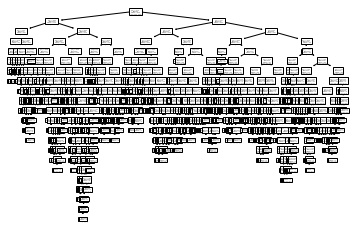

In [496]:
from xml.etree.ElementTree import tostring
from sklearn import tree
from sklearn.model_selection import cross_val_score

treeArr4 = []
scoresArr4 = []
for i in range (10):
    treeArr4.append( tree.DecisionTreeClassifier( criterion = 'gini', max_depth = 100 * (i + 1),
        splitter = "best", random_state = 123, min_samples_leaf = 5 ) )
    treeArr4[i].fit(X_train, y_train)
    scoresArr4.append( cross_val_score( treeArr4[i], X_train, y_train, cv = 5, scoring = 'accuracy' ) )
    print("scoresArr4[", i, "] = ", scoresArr4[i])
    print("scoresArr4[", i, "].mean() = ", scoresArr4[i].mean())
tree.plot_tree(treeArr4[9])
    #tree.export_graphviz(decision_tree = treeArr4[i], class_names = True ) #,
    #        #out_file = "DTClassifier-9b-max_depth" + str(i + 1) + "00.dot")

# On the test set:

In [497]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.5574879 , -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.75572424, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [-0.48846968, -0.81943583,  1.05479959, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.48846968, -0.81943583, -0.64794832, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.11505765,  0.75802814, -0.64794832, ...,  0.        ,
         1.        ,  0.        ],
       [-1.02297879, -0.81943583, -0.64794832, ...,  0.        ,
         0.        ,  1.        ]])

In [498]:
y_predArr4 = []

for i in range(10):
    y_predArr4.append( treeArr4[i].predict( X_test ) )
    print(y_predArr4[i])

#y_pred1 = tree1.predict(X_test)  
#y_pred1

[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]
[2 2 2 ... 2 1 2]


In [499]:
y_test = test_data["winner"]

In [500]:
from sklearn.metrics import mean_absolute_error

for i in range(10):
    mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_predArr4[i]
       )
    print(f"Mean Absolute Error for model", i + 41, " = ", mae)

Mean Absolute Error for model 41  =  0.026148339630145158
Mean Absolute Error for model 42  =  0.026148339630145158
Mean Absolute Error for model 43  =  0.026148339630145158
Mean Absolute Error for model 44  =  0.026148339630145158
Mean Absolute Error for model 45  =  0.026148339630145158
Mean Absolute Error for model 46  =  0.026148339630145158
Mean Absolute Error for model 47  =  0.026148339630145158
Mean Absolute Error for model 48  =  0.026148339630145158
Mean Absolute Error for model 49  =  0.026148339630145158
Mean Absolute Error for model 50  =  0.026148339630145158


In [501]:
from sklearn.metrics import accuracy_score
accuracyArr4 = []
for i in range (10):
    accuracyArr4.append( accuracy_score(y_test, y_predArr4[i]) )
    print( "Accuracy of model", i + 41, " = ", accuracyArr4[i] ) 

Accuracy of model 41  =  0.9738516603698548
Accuracy of model 42  =  0.9738516603698548
Accuracy of model 43  =  0.9738516603698548
Accuracy of model 44  =  0.9738516603698548
Accuracy of model 45  =  0.9738516603698548
Accuracy of model 46  =  0.9738516603698548
Accuracy of model 47  =  0.9738516603698548
Accuracy of model 48  =  0.9738516603698548
Accuracy of model 49  =  0.9738516603698548
Accuracy of model 50  =  0.9738516603698548


In [502]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree41', accuracyArr4[0]],
      ['tree42', accuracyArr4[1]],
      ['tree43', accuracyArr4[2]],
      ['tree44', accuracyArr4[3]],
      ['tree45', accuracyArr4[4]],
      ['tree46', accuracyArr4[5]],
      ['tree47', accuracyArr4[6]],
      ['tree48', accuracyArr4[7]],
      ['tree49', accuracyArr4[8]],
      ['tree50', accuracyArr4[9]],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+
| Tree   | Accuracy           |
+--------+--------------------+
| tree41 | 0.9738516603698548 |
+--------+--------------------+
| tree42 | 0.9738516603698548 |
+--------+--------------------+
| tree43 | 0.9738516603698548 |
+--------+--------------------+
| tree44 | 0.9738516603698548 |
+--------+--------------------+
| tree45 | 0.9738516603698548 |
+--------+--------------------+
| tree46 | 0.9738516603698548 |
+--------+--------------------+
| tree47 | 0.9738516603698548 |
+--------+--------------------+
| tree48 | 0.9738516603698548 |
+--------+--------------------+
| tree49 | 0.9738516603698548 |
+--------+--------------------+
| tree50 | 0.9738516603698548 |
+--------+--------------------+


# Comparison
By varying the min_samples_leaf hyper-parameter, the accuracy was improved for both  
min_samples_leaf = 3, and  min_samples_leaf = 5.  
The best result was obtained with a value of 5 for the attribute.  
Both new values improved the best result previously obtained.  
This increment in the value of min_samples_leaf can prevent overfitting.

# 10. Naive Bayes: MultinomialNB classifier

Data extraction:

In [503]:
games = pd.read_csv('./games.csv', ';')
#print(games.head(5))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

/home/diegoflm/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [504]:
# Cuantitative variables (integer)
games.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Split training data from test data: 80% for training, 20% for testing.

In [505]:
from sklearn.model_selection import train_test_split
N=len(games)
cTrain=int(N*0.8) # 80% for training and 20% for testing
cTest=N-cTrain
print(N,cTrain,cTest)
train_data, test_data = sklearn.model_selection.train_test_split(games, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [506]:
train_data.shape

(40228, 18)

# Pipeline for categorical attributes

In [507]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [508]:
#6 categorical attributes, where the numeric values don't have a numerical meaning.
cat_atts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Pipeline for numeric attributes

In [509]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [510]:
#10 numeric attributes
#num_atts = ['gameDuration', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
num_atts =                  ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
        't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 
        't2_riftHeraldKills']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median"))#,
        #("scaler", StandardScaler())    #Standarization by centering and scaling.
    ])

# Full Pipeline

In [511]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", cat_pipeline, cat_atts), 
])

In [512]:
X_train = full_pipeline.fit_transform(train_data)
#X_train.shape
X_train[0,:]

array([0., 0., 0., 0., 0., 5., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])

In [513]:
y_train = train_data["winner"]
y_train

5011     2
17241    1
16561    2
20245    1
3434     2
        ..
5154     1
49507    2
22697    1
17406    2
33935    1
Name: winner, Length: 40228, dtype: int64

# Model

In [514]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

BayesModel = MultinomialNB()
BayesModel.fit(X_train, y_train)
scores1 = cross_val_score(BayesModel, X_train, y_train, cv=5,scoring='accuracy')
scores1.mean()

0.9524957195318962

# Test

In [515]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 9.,  1.,  0., ...,  0.,  1.,  0.],
       [11.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 9.,  2.,  0., ...,  1.,  0.,  0.],
       [ 9.,  2.,  1., ...,  1.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  1.]])

In [516]:
BayesModely_pred = BayesModel.predict(X_test)  
BayesModely_pred

array([1, 1, 2, ..., 1, 1, 2])

In [517]:
y_test = test_data["winner"]

# Results

In [518]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, BayesModely_pred)

0.9523762179359714

The accuracy for MultinomialNB Bayesian classificator is: 0.9523762179359714

# Conclusions
With a Bayesian classificator, the best result was obtained for:  
tree.DecisionTreeClassifier(  
&emsp;  criterion = 'gini',  
&emsp;  splitter = "best",  
&emsp;  random_state = 123,  
&emsp;  min_samples_leaf = 5  
 )

with an accuracy of: 0.9738516603698548

# The technique with the best result:
The model with both, the best general, and the highest accuracy was Neuronal Network.  
The highest accuracy was obtained with model4C: 0.9820043746271625